# Wizualizacja grafu: z kim Polska wymieniała się punktami podczas Eurowizji 2022?

## import bibliotek

In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

## Odczytanie danych

In [2]:
jury_df = pd.read_csv("2022_jury_results.csv")
televote_df = pd.read_csv("2022_televote_results.csv")

Utworzenie nowej ramki danych, która będzie sumowała punkty od telewidzów i jurorów

In [46]:
jury_df = jury_df.fillna(0)
televote_df = televote_df.fillna(0)
total_df = jury_df
n = total_df.shape[0]
m = total_df.shape[1]-5
for i in range(n):
  for j in range(m):
    total_df.iloc[i, j+5] += televote_df.iloc[i, j+5]
total_df

,Contestant,Total score,Jury score,Televoting score,Netherlands,San Marino,North Macedonia,Malta,Ukraine,Albania,...,Georgia,Croatia,Lithuania,Austria,Finland,United Kingdom,Sweden,Australia,Czech Republic,Italy
0,Czech Republic,38,33,5,0.0,0.0,15.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0
1,Romania,65,12,53,0.0,3.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,24.0
2,Portugal,207,171,36,8.0,0.0,0.0,0.0,10.0,1.0,...,7.0,10.0,29.0,10.0,0.0,3.0,0.0,6.0,5.0,3.0
3,Finland,38,12,26,0.0,0.0,0.0,3.0,12.0,6.0,...,6.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,3.0,1.0
4,Switzerland,78,78,0,10.0,1.0,1.0,0.0,6.0,0.0,...,0.0,1.0,7.0,1.0,0.0,2.0,0.0,0.0,6.0,3.0
5,France,17,9,8,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,Norway,182,36,146,3.0,6.0,6.0,12.0,6.0,0.0,...,0.0,15.0,6.0,20.0,22.0,18.0,33.0,30.0,11.0,12.0
7,Armenia,61,40,21,0.0,0.0,0.0,0.0,2.0,4.0,...,30.0,0.0,0.0,6.0,1.0,0.0,2.0,0.0,0.0,8.0
8,Italy,268,158,110,0.0,18.0,25.0,37.0,0.0,36.0,...,10.0,22.0,13.0,12.0,2.0,0.0,0.0,6.0,0.0,0.0
9,Spain,459,231,228,5.0,42.0,42.0,33.0,3.0,26.0,...,23.0,27.0,23.0,5.0,9.0,25.0,18.0,30.0,25.0,0.0


## Tworzenie grafu
Zbierzmy dane z ramki danych żeby stworzyć wierzchołki

In [47]:
country_names = total_df["Contestant"].tolist()
country_scores = total_df["Total score"].tolist()
nodes_values=dict(zip(country_names, country_scores))
nodes_values

{'Czech Republic': 38,
 'Romania': 65,
 'Portugal': 207,
 'Finland': 38,
 'Switzerland': 78,
 'France': 17,
 'Norway': 182,
 'Armenia': 61,
 'Italy': 268,
 'Spain': 459,
 'Netherlands': 171,
 'Ukraine': 631,
 'Germany': 6,
 'Lithuania': 128,
 'Azerbaijan': 106,
 'Belgium': 64,
 'Greece': 215,
 'Iceland': 20,
 'Moldova': 253,
 'Sweden': 438,
 'Australia': 125,
 'United Kingdom': 466,
 'Poland': 151,
 'Serbia': 312,
 'Estonia': 141}

Z ramki danych tworzymy macierz kwadratową głosów
następnie tworzymy ramkę danych odpowiedzialną za krawędzie

In [48]:
total_matrix = total_df.iloc[0:25, 4:44].set_index(total_df.iloc[0:25, 0])
edgelist_df = pd.DataFrame(total_matrix.unstack(), columns=["weight"])
edgelist_df.reset_index(inplace=True)
edgelist_df.columns = ["source", "target", "weight"]

In [63]:
print(edgelist_df)

            source          target  weight
0          Albania          Greece    36.0
1          Albania           Italy    36.0
2          Albania         Ukraine    37.0
3          Armenia         Estonia    39.0
4          Armenia           Spain    36.0
..             ...             ...     ...
74           Spain         Ukraine    36.0
75          Sweden         Ukraine    36.0
76     Switzerland         Ukraine    33.0
77         Ukraine  United Kingdom    33.0
78  United Kingdom         Ukraine    36.0

[79 rows x 3 columns]


Usuwamy wierzchołki o wadze mniejszej niż 40. Następnie scalamy krawędzie tak, żeby A->B było tym samym co B->A

In [65]:
edgelist_df = edgelist_df[edgelist_df["weight"] > 40]

edgelist_df = edgelist_df[edgelist_df["source"] != edgelist_df["target"]]

edgelist_df["key"] = edgelist_df[["source", "target"]].apply(lambda x: ''.join(sorted(x)), axis=1)
edgelist_df = edgelist_df.groupby(["key", "source", "target"], as_index=False)["weight"].sum()
edgelist_df.drop(columns=["key"], inplace=True)

graph = nx.from_pandas_edgelist(edgelist_df, edge_attr=True)
nx.set_node_attributes(graph, nodes_values, "value")

## Graf
Tworzymy nasz graf. Grubość krawędzi oznacza liczbę przyznanych wzajemnie punktów, a wielkość węzła liczbę punktów zdobytych w finale

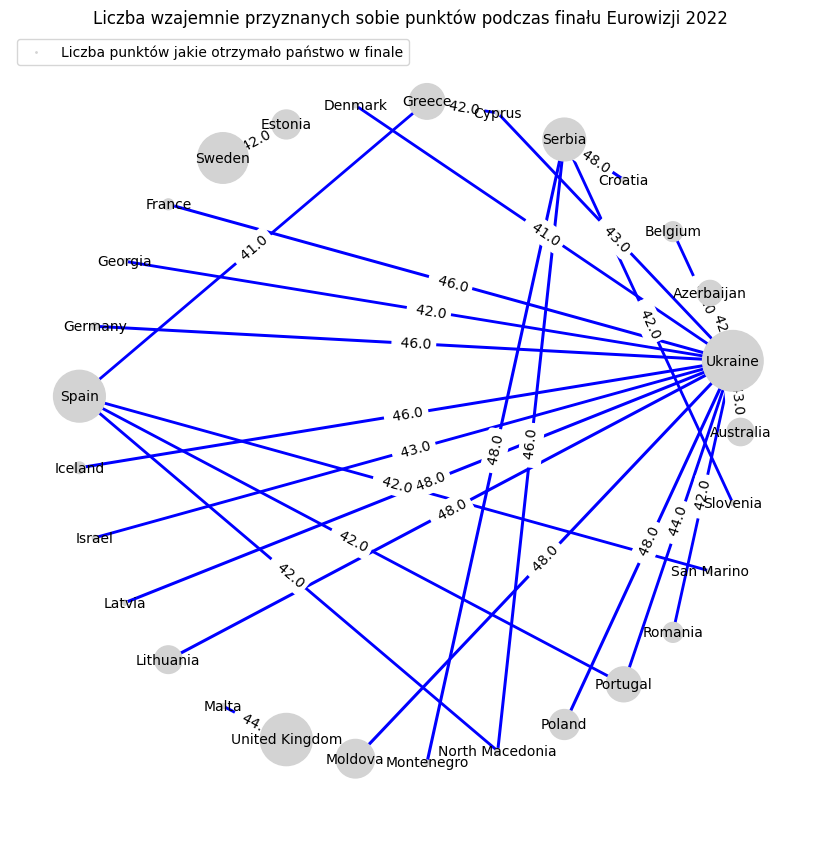

In [73]:
pos = nx.circular_layout(graph)

node_sizes = [graph.nodes[node].get("value", 1) * 3 + 10 for node in graph.nodes]

edge_widths = [graph.edges[edge]["weight"] /40 + 1 for edge in graph.edges]

plt.figure(figsize=(8, 8))
nx.draw(graph, pos=pos, with_labels=False,
        node_size=node_sizes, node_color="lightgrey",
        edge_color= "blue", width = edge_widths)

node_labels = {node: f"{node}" for node in graph.nodes}
nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size = 10)

edge_labels = {(edge[0], edge[1]): f" {graph.edges[edge]['weight']}" for edge in graph.edges}
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

scatter = plt.scatter([], [], s=[], c="lightgrey", label="Liczba punktów jakie otrzymało państwo w finale")
plt.title("Liczba wzajemnie przyznanych sobie punktów podczas finału Eurowizji 2022")
plt.legend(loc="upper left")
plt.show()

## Wnioski
Na wykresie między innymi widać:
- wiele państw dających punkty Ukrainie
- "przyjaźń" Greków i Cypryjczyków
- niechęć Hiszpanii do ukraińskiego zwycięstwa (sami byli pretendentami do wygranej)